In [36]:
import random

import torch

import src.models as models
from src.audio_augmentations import PitchShiftAugmentation, TimeStretchAugmentation
from src.audio_dataset import get_dataloader
from src.trainer import Trainer


mel_spec_params = {"n_fft": 512, "hop_length": 256, "n_mels": 96, "top_db": 80}

test_annotations = 'mtat_test_label.csv'
data_dir = '../data'
    
# Ealuate the model on the test set
test_loader = get_dataloader(
    annotations_file=test_annotations,
    data_dir=data_dir,
    batch_size=32,
    shuffle=False,
    num_workers=0,
    sample_rate=16000,
    target_length=29.1,
    transform_params=mel_spec_params,
)

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_class = getattr(models, 'FullyConvNet4')
model = model_class().to(device)


In [37]:
# Initialize the Trainer
trainer = Trainer(model, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)

# Load model
trainer.load_model('../models/FullyConvNet4_epoch60_20231127-1203.pth')

In [40]:
print(trainer.history)

{'train_loss': [0.1927002911681164, 0.16151239538359843, 0.1501315273597338, 0.14381217355097092, 0.1390739477140169, 0.13568002887539857, 0.13231786188863714, 0.1298756187794053, 0.12776095276259494, 0.12506381831505983, 0.12321985744445736, 0.12089419925367637, 0.1187039896189854, 0.11651246037471721, 0.11476682013481045, 0.11297132093629245, 0.11035540710509142, 0.10882651725845979, 0.10666956245403897, 0.10463351901593673, 0.10275982494718165, 0.1011529468444901, 0.09934103081817001, 0.09759702186009035, 0.09521103706006222, 0.09377921577812266, 0.09234340815990788, 0.09041245792027894, 0.08923861666945311, 0.08812084025014301, 0.086345286312497, 0.08528761223249576, 0.08340037369235163, 0.08246511497379001, 0.08149629999091931, 0.08023408093454372, 0.07893388846227044, 0.07752761071992131, 0.07656070187801145, 0.07527516325645431, 0.07453682770666618, 0.0737096620049247, 0.07238306675827011, 0.07241870514130813, 0.06998669999244975, 0.07036175141983533, 0.06914218322921077, 0.0674

In [4]:
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer.evaluate(test_loader)

In [19]:
print(predicted_labels)
print(true_labels)

[array([[4.2730591e-01, 3.7093654e-01, 4.7446513e-01, ..., 7.8478406e-06,
        1.8851013e-03, 3.8644262e-03],
       [5.2459080e-02, 3.7207216e-01, 9.5920287e-02, ..., 9.6549556e-05,
        5.5639958e-03, 5.8523044e-03],
       [1.9403859e-03, 1.2249867e-05, 2.4918802e-03, ..., 2.4892709e-01,
        6.2403433e-07, 1.0492639e-04],
       ...,
       [7.3098250e-02, 4.3084737e-04, 6.8060006e-03, ..., 8.0689155e-03,
        4.2290697e-04, 8.3518818e-05],
       [2.7981935e-02, 1.2434467e-03, 6.1081094e-01, ..., 1.3867971e-02,
        5.0336029e-04, 5.7327221e-03],
       [6.7272651e-01, 8.3373792e-02, 2.7658483e-01, ..., 2.1454880e-02,
        1.8885976e-02, 3.6881573e-02]], dtype=float32), array([[2.1780531e-01, 1.4956389e-03, 8.1426710e-02, ..., 3.9259940e-03,
        1.4119765e-02, 3.4251316e-03],
       [3.6377353e-03, 6.3104024e-05, 9.5413625e-03, ..., 3.9741978e-02,
        9.4663005e-07, 1.6011958e-04],
       [1.2525342e-01, 4.8615940e-02, 3.3632040e-01, ..., 3.8581758e-03,
 

In [20]:
index = 5
# print(f"File path at index {index}: {filepaths[index]}")
print(f"True label at index {index}: {true_labels[index]}")
print(f"Predicted label at index {index}: {predicted_labels[index]}")

True label at index 5: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Predicted label at index 5: [[2.99713649e-02 2.54015386e-01 4.88294303e-01 ... 1.21695967e-02
  7.62116339e-04 5.17167449e-02]
 [9.19816911e-01 1.82527173e-02 1.76330432e-01 ... 6.35523684e-05
  5.48437014e-02 2.29150755e-04]
 [4.39960718e-01 3.71528533e-03 1.17651112e-01 ... 1.53420423e-03
  5.44493203e-04 5.56482421e-03]
 ...
 [7.26148248e-01 1.06187887e-03 3.14963907e-02 ... 4.00698651e-03
  7.58561247e-04 2.34200130e-03]
 [5.71303209e-03 9.78232711e-05 1.60391256e-01 ... 3.13217100e-03
  5.31231626e-06 1.15790160e-03]
 [1.32567570e-01 1.40639115e-02 5.74470833e-02 ... 1.87505968e-03
  2.27533020e-02 1.09423688e-02]]


In [12]:
print(roc_auc)
print(pr_auc)
print(len(true_labels))
print(len(predicted_labels))
print(len(filepaths))


0.8908385014489794
0.424052511668597
136
136
136


In [10]:
import pandas as pd
import numpy as np
flat_true_labels = [label for sublist in true_labels for label in sublist]
flat_predicted_labels = [pred for sublist in predicted_labels for pred in sublist]
flat_filepaths = [path for sublist in filepaths for path in sublist]

# Convert predicted probabilities to binary
binary_predictions = [np.where(pred > 0.5, 1, 0) for pred in flat_predicted_labels]

# Create DataFrame
df = pd.DataFrame({
    'Filepath': flat_filepaths,
    'True Label': flat_true_labels,
    'Predicted Label': binary_predictions
})

# Display the first few rows of the DataFrame
df.head()

,Filepath,True Label,Predicted Label
0,../data/mtat/e/seth_carlin-mozart_in_the_age_o...,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,../data/mtat/2/vito_paternoster-cd2bach_cello_...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,../data/mtat/5/processor-are_you_for_real-06-w...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,../data/mtat/2/roots_of_rebellion-surfacing-03...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,../data/mtat/c/the_art_of_the_lute_player-the_...,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


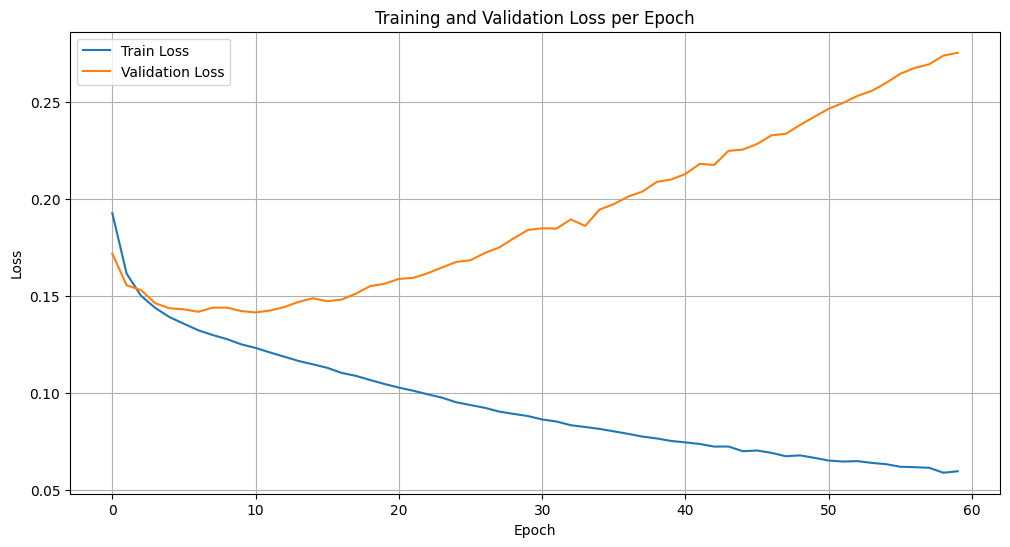

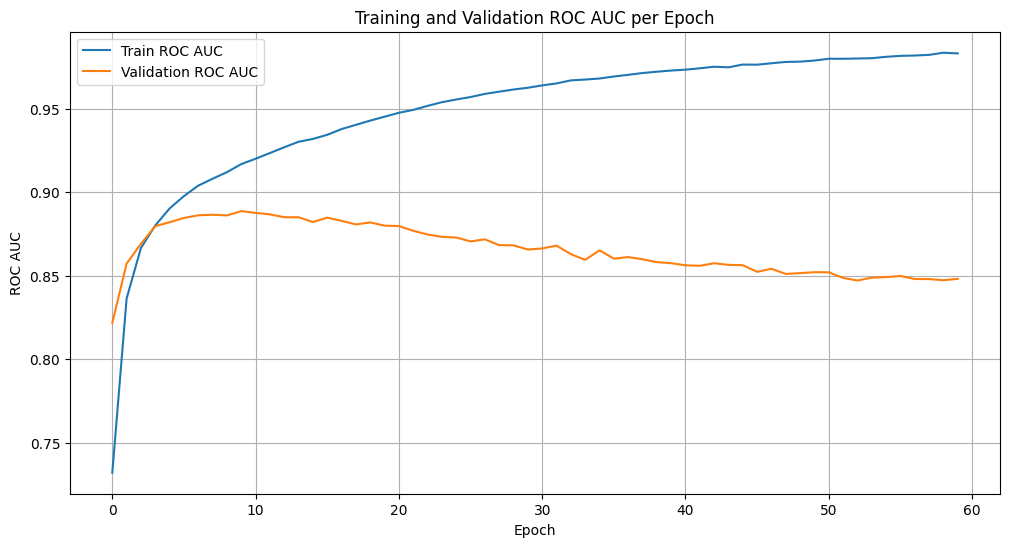

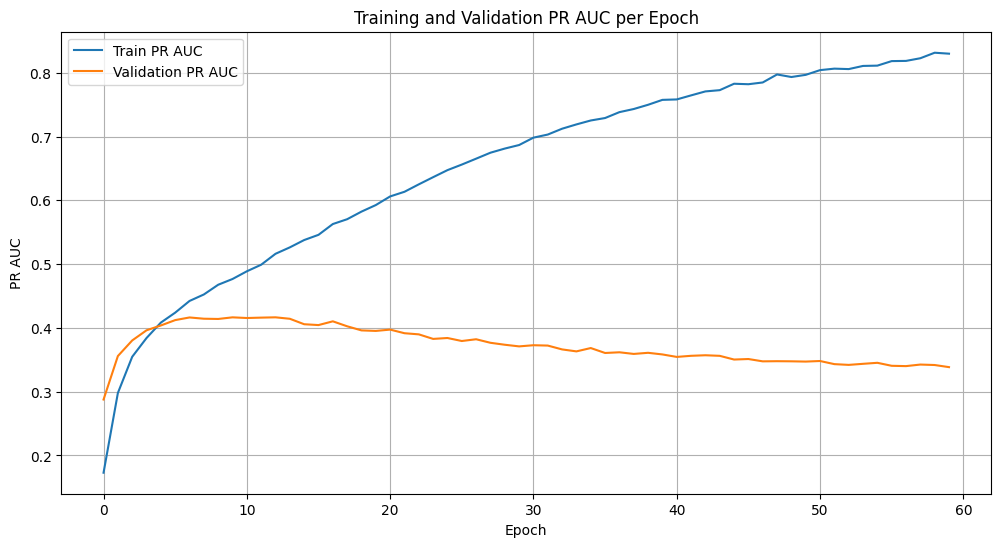

In [41]:
import matplotlib.pyplot as plt

history = trainer.history

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training and Validation ROC AUC
plt.figure(figsize=(12, 6))
plt.plot(history['train_roc_auc'], label='Train ROC AUC')
plt.plot(history['val_roc_auc'], label='Validation ROC AUC')
plt.title('Training and Validation ROC AUC per Epoch')
plt.xlabel('Epoch')
plt.ylabel('ROC AUC')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training and Validation PR AUC
plt.figure(figsize=(12, 6))
plt.plot(history['train_pr_auc'], label='Train PR AUC')
plt.plot(history['val_pr_auc'], label='Validation PR AUC')
plt.title('Training and Validation PR AUC per Epoch')
plt.xlabel('Epoch')
plt.ylabel('PR AUC')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Read the list from the file
with open('../data/top_50_labels.txt', 'r') as file:
    label_names = file.read().splitlines()

print(label_names)

['guitar', 'classical', 'slow', 'techno', 'string', 'vocal', 'electro', 'drum', 'no singer', 'rock', 'fast', 'male', 'beat', 'female', 'piano', 'ambient', 'violin', 'synth', 'india', 'singer', 'opera', 'harpsichord', 'loud', 'quiet', 'flute', 'pop', 'soft', 'sitar', 'solo', 'choir', 'new age', 'dance', 'strange', 'harp', 'heavy', 'cello', 'jazz', 'country', 'eastern', 'bass', 'modern', 'no piano', 'hard', 'chant', 'baroque', 'orchestra', 'foreign', 'trance', 'folk', 'no beat']


In [28]:
binary_predictions

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

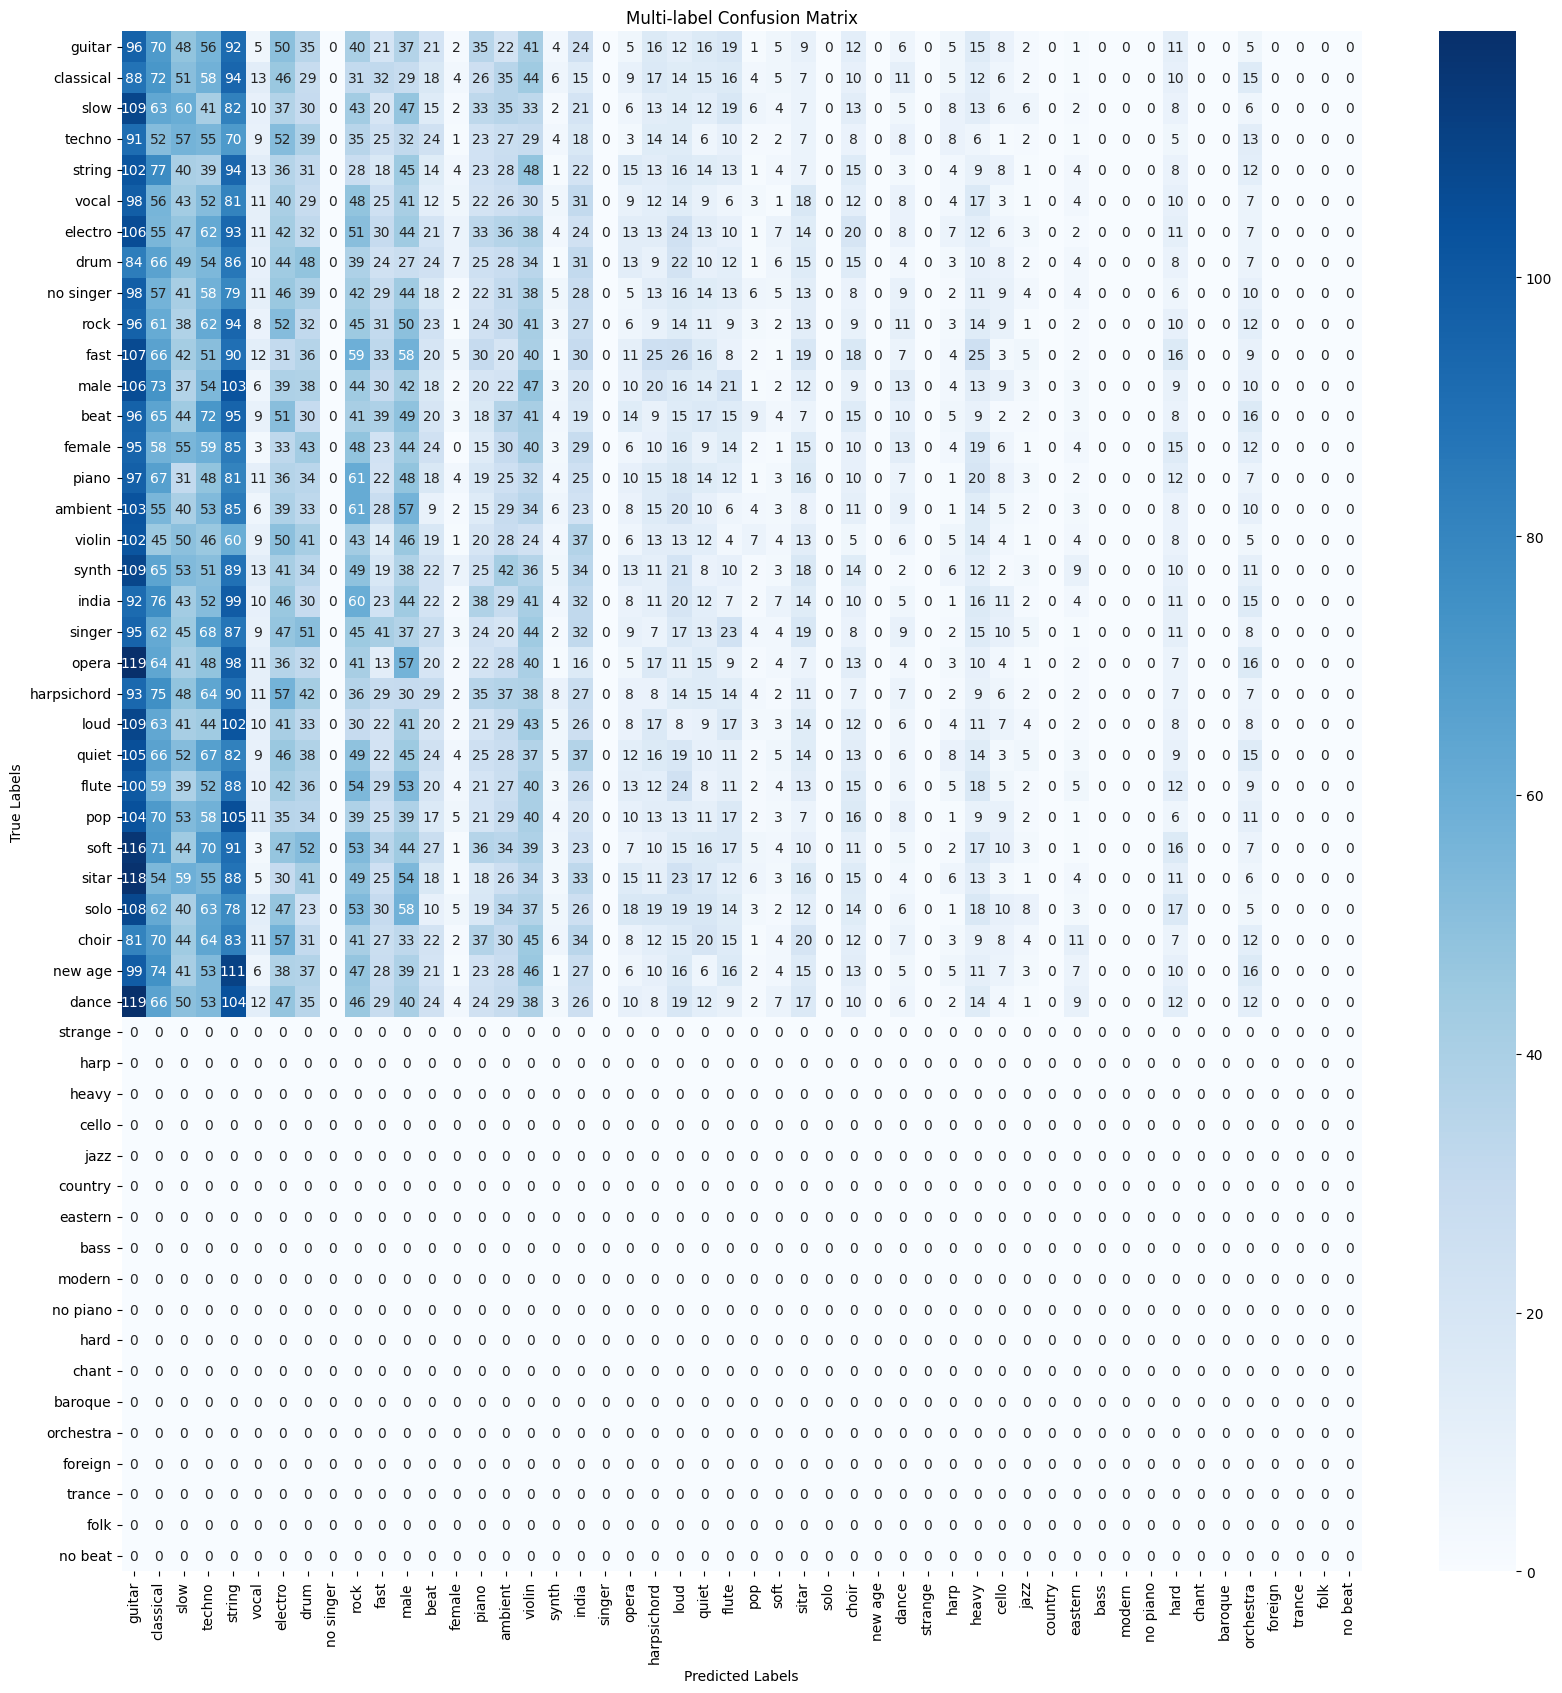

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming label_names contains the list of label names
num_labels = len(label_names)

# Ensure flat_true_labels is a list of lists of label indices
# true_labels should be a list of binary arrays (one array per sample)
flat_true_labels = [np.where(row == 1)[0].tolist() for row in true_labels]

# Ensure binary_predictions is converted to a list of lists of predicted label indices
binary_predictions = [np.where(row > 0.5, 1, 0) for row in flat_predicted_labels]
predicted_label_indices = [np.where(row == 1)[0].tolist() for row in binary_predictions]

# Initialize the confusion matrix
conf_matrix = np.zeros((num_labels, num_labels), dtype=int)

# Populate the confusion matrix
for true, pred in zip(flat_true_labels, predicted_label_indices):
    for true_label in true:
        for pred_label in pred:
            if true_label < num_labels and pred_label < num_labels:
                conf_matrix[true_label, pred_label] += 1

# Plot the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multi-label Confusion Matrix')
plt.show()